# <font color='blue'> Project 2 - Regression </font>
#### Group Members:
#### Femina Martin Pereira - FXP190002
#### Divya Deepak Pai - DXP190009
    
### Dataset Source:
The data set contains data on used cars (Toyota Corolla) on sale during the late summer of 2004 in the Netherlands. The data set is from the book Data Mining in Excel by 2005 Galit Shmueli, Nitin R. Patel, Peter C. Bruce.(https://www3.nd.edu/~busiforc/problems/DataMining/ToyotaCorolla.xls).
It has 1421 records containing details on 38 attributes including Price, Age, Kilometers, Horsepower, and other specifications 
    
### Dataset Description:    
A large Toyota car dealer offers purchasers of a new Toyota cars the option to buy from them their used car. In particular, a new promotion promises to pay high prices for used Toyota Corolla cars for purchasers of a new car. The dealer then sells the used cars with a small profit. In order to
ensure a reasonable profit, the dealer needs to be able to predict the price that they will get for the used cars. For that reason they collected data on all previous sales of used Toyota Corolla’s at their dealership. The data include the sales price and information on the car such as its age, mileage, fuel
type, engine size, etc (Data Mining in Excel, 2005, pg.57)

### Goal:
The regression goal is to predict various factors which has been chosen initially that really affect the price of the Toyota Corolla model. 
    
### 1) Attributes Information:

#### I) Feature Set
##### Toyota Corolla Car Atrributes:-
- Id Record_ID
- Model Model Description
-Age_08_04 Age in months as in August 2004
-Mfg_Month	Manufacturing month
-Mfg_Year	Manufacturing Year
-KM	Accumulated Kilometers on odometer
-Fuel_Type	Fuel Type (Petrol, Diesel, CNG)
-HP	Horse Power
-Met_Color	Metallic Color?  (Yes=1, No=0)
-Color	Color (Blue, Red, Grey, Silver, Black, etc.)
-Automatic	Automatic ( (Yes=1, No=0)
-CC	Cylinder Volume in cubic centimeters
-Doors	Number of doors
-Cylinders	Number of cylinders
-Gears	Number of gear positions
-Quarterly_Tax	Quarterly road tax in EUROs
-Weight	Weight in Kilograms
-Mfr_Guarantee	Within Manufacturer's Guarantee period  (Yes=1, No=0)
-BOVAG_Guarantee	BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
-Guarantee_Period	Guarantee period in months
-ABS	Anti-Lock Brake System (Yes=1, No=0)
-Airbag_1	Driver_Airbag  (Yes=1, No=0)
-Airbag_2	Passenger Airbag  (Yes=1, No=0)
-Airco	Airconditioning  (Yes=1, No=0)
-Automatic_airco	Automatic Airconditioning  (Yes=1, No=0)
-Boardcomputer	Boardcomputer  (Yes=1, No=0)
-CD_Player	CD Player  (Yes=1, No=0)
-Central_Lock	Central Lock  (Yes=1, No=0)
-Powered_Windows	Powered Windows  (Yes=1, No=0)
-Power_Steering	Power Steering  (Yes=1, No=0)
-Radio	Radio  (Yes=1, No=0)
-Mistlamps	Mistlamps  (Yes=1, No=0)
-Sport_Model	Sport Model  (Yes=1, No=0)
-Backseat_Divider	Backseat Divider  (Yes=1, No=0)
-Metallic_Rim	Metallic Rim  (Yes=1, No=0)
-Radio_cassette	Radio Cassette  (Yes=1, No=0)
-Parking_Assistant	Parking assistance system  (Yes=1, No=0)
-Tow_Bar	Tow Bar  (Yes=1, No=0)
   
#### II) Target Value
- Price	Offer Price in EUROs


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analaysis and Pre-Processing 

### 1) Importing the Original Dataset with no missing values

In [2]:
df = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')

In [3]:
main = df
main

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,October,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,October,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,September,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,July,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,March,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,December,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0
1421,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,September,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1422,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,October,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1423,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,November,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### 3) Splitting the Main Dataset to X - Features and Y - Target
##### We are first splitting the datasets to X and Y because we want to introduce NaN values only to the feature dataset

In [4]:
# Y - Target Dataset
Y = main['Price']
Y

#X - Feature Dataset
X = main
X.drop(columns = ['Price'], axis =1, inplace=True)
X

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,October,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23,October,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,September,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,July,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30,March,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,69,December,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0
1421,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,72,September,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1422,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,71,October,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1423,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,70,November,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### 4) Since the dataset is complete, we randomly insert 5-10% NaN values. 
#### Replace about 5 percent of the feature data with NaN values using np.random.random

In [5]:
np.random.seed(0)
X = X.mask(np.random.random(X.shape) < .05)

### 5) Test what percentage of data is missing
#### Below the code shows that only 95% of Data is available and the rest 5% is NaN values as we intended it to be

In [6]:
val = 0
for col in X.columns:
    val += X[col].count()

print(val / X.size )

0.9493628808864266


In [7]:
X

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1.0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23.0,October,2002.0,46986.0,Diesel,90.0,1.0,Blue,0.0,2000.0,3.0,4.0,5.0,210.0,NaN,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0
1,2.0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,23.0,October,2002.0,72937.0,Diesel,90.0,1.0,Silver,0.0,2000.0,3.0,4.0,5.0,210.0,1165.0,0.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,3.0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24.0,September,2002.0,41711.0,Diesel,90.0,1.0,Blue,0.0,2000.0,3.0,4.0,5.0,210.0,1165.0,1.0,1.0,3.0,1.0,NaN,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26.0,July,2002.0,48000.0,Diesel,90.0,0.0,Black,0.0,2000.0,NaN,4.0,5.0,210.0,1165.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,30.0,March,2002.0,38500.0,Diesel,90.0,0.0,Black,0.0,2000.0,3.0,4.0,NaN,210.0,1170.0,1.0,1.0,3.0,1.0,NaN,1.0,1.0,0.0,1.0,0.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,1438.0,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,69.0,December,1998.0,20544.0,Petrol,NaN,1.0,Blue,0.0,1300.0,3.0,4.0,5.0,69.0,1025.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1421,1439.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,72.0,September,1998.0,19000.0,NaN,86.0,0.0,Grey,0.0,1300.0,3.0,4.0,5.0,NaN,1015.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1422,1440.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,71.0,October,1998.0,17016.0,Petrol,86.0,0.0,Blue,0.0,1300.0,3.0,4.0,5.0,69.0,1015.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0
1423,1441.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,70.0,November,1998.0,16916.0,Petrol,86.0,1.0,Grey,0.0,1300.0,3.0,4.0,5.0,69.0,1015.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 6) Performing Train and Test Splits

In [8]:
from sklearn.model_selection import train_test_split

#Split for the Feature Dataset X
train_X, test_X = train_test_split(X, random_state = 0)

#Split for the Target Dataset Y
train_Y, test_Y = train_test_split(Y, random_state = 0)

In [9]:
train_X

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1297,1313.0,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,76.0,May,1998.0,70039.0,Petrol,110.0,1.0,Grey,0.0,1600.0,3.0,4.0,5.0,69.0,1050.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
338,343.0,TOYOTA Corolla Liftback 1.6 VVTI 4/5-Doors,41.0,April,2001.0,29716.0,Petrol,116.0,1.0,Grey,0.0,1600.0,5.0,4.0,5.0,85.0,1075.0,0.0,1.0,3.0,1.0,1.0,NaN,NaN,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
649,656.0,TOYOTA Corolla 1.6 G6-R 2/3-Doors,63.0,June,1999.0,115000.0,CNG,110.0,0.0,Red,0.0,1600.0,3.0,NaN,5.0,197.0,1109.0,0.0,1.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1366,1382.0,TOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-D...,80.0,January,1998.0,57000.0,Petrol,86.0,0.0,Blue,0.0,1300.0,4.0,4.0,5.0,69.0,1000.0,1.0,1.0,3.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
918,927.0,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,67.0,February,1999.0,57000.0,Petrol,110.0,0.0,Grey,0.0,1600.0,3.0,4.0,5.0,69.0,1050.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,772.0,TOYOTA Corolla 2.0 D Linea luna Wagon Stationw...,59.0,October,1999.0,78750.0,Diesel,90.0,1.0,Silver,NaN,1975.0,5.0,4.0,5.0,210.0,1155.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
835,844.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3...,68.0,January,1999.0,66785.0,Petrol,86.0,0.0,Blue,1.0,1300.0,3.0,4.0,5.0,69.0,1045.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1216,1232.0,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,74.0,July,1998.0,84123.0,Petrol,110.0,0.0,Black,0.0,1600.0,3.0,4.0,5.0,69.0,1050.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
559,566.0,TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-...,NaN,October,2000.0,38900.0,NaN,97.0,1.0,Grey,0.0,1400.0,3.0,4.0,5.0,NaN,1025.0,0.0,1.0,3.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0


In [10]:
train_Y

1297     7500
338     11900
649      9450
1366     7750
918      8250
        ...  
763     10950
835     10400
1216     7950
559      8950
684      9450
Name: Price, Length: 1068, dtype: int64

In [11]:
test_X

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
740,748.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,65.0,April,1999.0,NaN,Petrol,86.0,1.0,Blue,0.0,1300.0,3.0,4.0,5.0,69.0,1015.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,1.0
644,651.0,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,68.0,January,1999.0,117000.0,Diesel,72.0,0.0,Silver,0.0,2000.0,3.0,4.0,5.0,185.0,1115.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0
434,440.0,TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-...,48.0,NaN,2000.0,78600.0,Petrol,110.0,1.0,Blue,0.0,1600.0,5.0,4.0,5.0,85.0,1075.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN
858,867.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,60.0,September,1999.0,64383.0,Petrol,86.0,0.0,Red,0.0,1300.0,3.0,4.0,5.0,69.0,1015.0,1.0,NaN,3.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141,143.0,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 4/5-D...,19.0,February,2003.0,21684.0,Petrol,192.0,1.0,Silver,0.0,1800.0,5.0,4.0,5.0,19.0,1185.0,0.0,1.0,12.0,1.0,1.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,422.0,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3...,55.0,February,2000.0,NaN,Petrol,86.0,NaN,Blue,0.0,1300.0,3.0,4.0,5.0,69.0,1015.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
283,NaN,TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-D...,41.0,April,2001.0,45287.0,Petrol,110.0,1.0,Red,0.0,1600.0,5.0,4.0,5.0,85.0,1075.0,0.0,1.0,3.0,1.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0
1254,1270.0,TOYOTA Corolla 1.3 Linea Terra wagon Stationwagen,78.0,NaN,1998.0,NaN,Petrol,86.0,1.0,Red,0.0,1300.0,NaN,4.0,5.0,69.0,1050.0,0.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1125,1140.0,TOYOTA Corolla 1.6 16V HATCHB S 2/3-Doors,72.0,September,1998.0,106108.0,Petrol,110.0,1.0,Blue,0.0,NaN,3.0,4.0,5.0,NaN,1050.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [12]:
test_Y

740      7450
644      6950
434      9750
858      8200
141     23950
        ...  
416      8950
283     11950
1254     8450
1125     7750
412      9950
Name: Price, Length: 357, dtype: int64

### 7) Exploratory Analysis on Train and Test Data
#### First we explore the Train and Test Data to see if we can drop insignificant columns and if imputations are required.

In [13]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1297 to 684
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1014 non-null   float64
 1   Model              1025 non-null   object 
 2   Age_08_04          1025 non-null   float64
 3   Mfg_Month          1013 non-null   object 
 4   Mfg_Year           1005 non-null   float64
 5   KM                 1015 non-null   float64
 6   Fuel_Type          1015 non-null   object 
 7   HP                 1023 non-null   float64
 8   Met_Color          1009 non-null   float64
 9   Color              1019 non-null   object 
 10  Automatic          1013 non-null   float64
 11  CC                 1018 non-null   float64
 12  Doors              1021 non-null   float64
 13  Cylinders          1018 non-null   float64
 14  Gears              1008 non-null   float64
 15  Quarterly_Tax      1013 non-null   float64
 16  Weight             101

### 8) Dropping Insignificant Columns from the Feature Dataset
#### The Id and Model Name are the ones which are insignificant so first we work on the Train_X and drop these columns

In [14]:
train_X.drop(columns = ['Id','Model'], axis = 1, inplace = True)
train_X


,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1297,76.0,May,1998.0,70039.0,Petrol,110.0,1.0,Grey,0.0,1600.0,3.0,4.0,5.0,69.0,1050.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
338,41.0,April,2001.0,29716.0,Petrol,116.0,1.0,Grey,0.0,1600.0,5.0,4.0,5.0,85.0,1075.0,0.0,1.0,3.0,1.0,1.0,NaN,NaN,0.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
649,63.0,June,1999.0,115000.0,CNG,110.0,0.0,Red,0.0,1600.0,3.0,NaN,5.0,197.0,1109.0,0.0,1.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1366,80.0,January,1998.0,57000.0,Petrol,86.0,0.0,Blue,0.0,1300.0,4.0,4.0,5.0,69.0,1000.0,1.0,1.0,3.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
918,67.0,February,1999.0,57000.0,Petrol,110.0,0.0,Grey,0.0,1600.0,3.0,4.0,5.0,69.0,1050.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,59.0,October,1999.0,78750.0,Diesel,90.0,1.0,Silver,NaN,1975.0,5.0,4.0,5.0,210.0,1155.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
835,68.0,January,1999.0,66785.0,Petrol,86.0,0.0,Blue,1.0,1300.0,3.0,4.0,5.0,69.0,1045.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1216,74.0,July,1998.0,84123.0,Petrol,110.0,0.0,Black,0.0,1600.0,3.0,4.0,5.0,69.0,1050.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
559,NaN,October,2000.0,38900.0,NaN,97.0,1.0,Grey,0.0,1400.0,3.0,4.0,5.0,NaN,1025.0,0.0,1.0,3.0,1.0,NaN,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0


#### Similarly we drop the Id and Model Name from the Test_X as well.

In [15]:
test_X.drop(columns = ['Id','Model'], axis = 1, inplace = True)
test_X

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
740,65.0,April,1999.0,NaN,Petrol,86.0,1.0,Blue,0.0,1300.0,3.0,4.0,5.0,69.0,1015.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,NaN,0.0,0.0,1.0
644,68.0,January,1999.0,117000.0,Diesel,72.0,0.0,Silver,0.0,2000.0,3.0,4.0,5.0,185.0,1115.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0
434,48.0,NaN,2000.0,78600.0,Petrol,110.0,1.0,Blue,0.0,1600.0,5.0,4.0,5.0,85.0,1075.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN
858,60.0,September,1999.0,64383.0,Petrol,86.0,0.0,Red,0.0,1300.0,3.0,4.0,5.0,69.0,1015.0,1.0,NaN,3.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141,19.0,February,2003.0,21684.0,Petrol,192.0,1.0,Silver,0.0,1800.0,5.0,4.0,5.0,19.0,1185.0,0.0,1.0,12.0,1.0,1.0,0.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,55.0,February,2000.0,NaN,Petrol,86.0,NaN,Blue,0.0,1300.0,3.0,4.0,5.0,69.0,1015.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
283,41.0,April,2001.0,45287.0,Petrol,110.0,1.0,Red,0.0,1600.0,5.0,4.0,5.0,85.0,1075.0,0.0,1.0,3.0,1.0,1.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0
1254,78.0,NaN,1998.0,NaN,Petrol,86.0,1.0,Red,0.0,1300.0,NaN,4.0,5.0,69.0,1050.0,0.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1125,72.0,September,1998.0,106108.0,Petrol,110.0,1.0,Blue,0.0,NaN,3.0,4.0,5.0,NaN,1050.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### 9) List of columns that have missing values in Test and Train

In [16]:
train_X.isnull().any()

Age_08_04            True
Mfg_Month            True
Mfg_Year             True
KM                   True
Fuel_Type            True
HP                   True
Met_Color            True
Color                True
Automatic            True
CC                   True
Doors                True
Cylinders            True
Gears                True
Quarterly_Tax        True
Weight               True
Mfr_Guarantee        True
BOVAG_Guarantee      True
Guarantee_Period     True
ABS                  True
Airbag_1             True
Airbag_2             True
Airco                True
Automatic_airco      True
Boardcomputer        True
CD_Player            True
Central_Lock         True
Powered_Windows      True
Power_Steering       True
Radio                True
Mistlamps            True
Sport_Model          True
Backseat_Divider     True
Metallic_Rim         True
Radio_cassette       True
Parking_Assistant    True
Tow_Bar              True
dtype: bool

In [17]:
test_X.isnull().any()

Age_08_04            True
Mfg_Month            True
Mfg_Year             True
KM                   True
Fuel_Type            True
HP                   True
Met_Color            True
Color                True
Automatic            True
CC                   True
Doors                True
Cylinders            True
Gears                True
Quarterly_Tax        True
Weight               True
Mfr_Guarantee        True
BOVAG_Guarantee      True
Guarantee_Period     True
ABS                  True
Airbag_1             True
Airbag_2             True
Airco                True
Automatic_airco      True
Boardcomputer        True
CD_Player            True
Central_Lock         True
Powered_Windows      True
Power_Steering       True
Radio                True
Mistlamps            True
Sport_Model          True
Backseat_Divider     True
Metallic_Rim         True
Radio_cassette       True
Parking_Assistant    True
Tow_Bar              True
dtype: bool

### 10) Exploring the Feature Dataset
Let us explore some of the features that will be used in our machine learning algorithms. This will give us a better idea about the distribution of features as well as how to handle imputation of missing values in order to clean the data. We will plot the histograms for continous features and a bar graph for discrete/binary features separately which will help us understand better these features.


#### a) Plotting Histograms for Continous Features.
Here Age, KM (Kilometers), HP (Horse Power), CC, Quarterly Tax, Weight and Guarantee Period are Continous Features.

Text(0.5, 1.0, 'Guarantee Period Histogram')

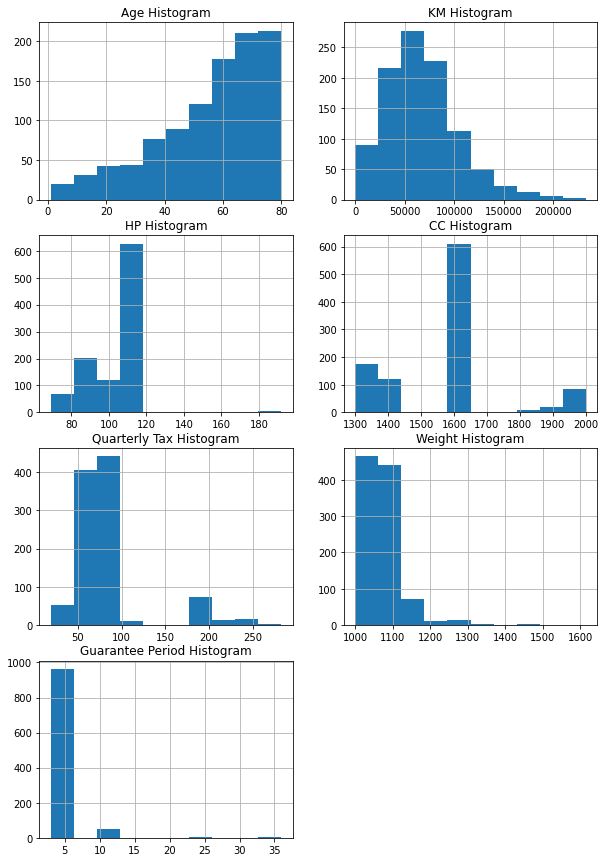

In [18]:
# Set up a grid of plots
plt.figure(figsize=(10,15)) 
fig_dims = (4, 2)

# Plot age histogram
plt.subplot2grid(fig_dims, (0,0))
train_X['Age_08_04'].hist()
plt.title('Age Histogram')

# Plot KM histogram
plt.subplot2grid(fig_dims, (0,1))
train_X['KM'].hist()
plt.title('KM Histogram')

# Plot HP histogram
plt.subplot2grid(fig_dims, (1,0))
train_X['HP'].hist()
plt.title('HP Histogram')

# Plot CC histogram
plt.subplot2grid(fig_dims, (1,1))
train_X['CC'].hist()
plt.title('CC Histogram')

# Plot Quarterly Tax histogram
plt.subplot2grid(fig_dims, (2,0))
train_X['Quarterly_Tax'].hist()
plt.title('Quarterly Tax Histogram')

# Plot Weight histogram
plt.subplot2grid(fig_dims, (2,1))
train_X['Weight'].hist()
plt.title('Weight Histogram')

# Plot Weight histogram
plt.subplot2grid(fig_dims, (3,0))
train_X['Guarantee_Period'].hist()
plt.title('Guarantee Period Histogram')

#### b) Analysis and Understanding of the Dataset For Continous Variables:
We can clearly see above the following trends for each of these variables:
    
1. **Age**: The histogram for Age is left skewed. The solution would be to perform median imputation for missing values.
2. **KM**: The histogram for KM its slightly right skewed. The solution would be to perform median imputation for missing values.
3. **HP**: has a few outliers at the higher extremes while majority of its values lies in range 5 to 120. The histogram for HP its slightly right skewed. The solution would be to perform median imputation.
4. **CC**: CC has sparce data with continuity from 1300-1400+, majority values at 1600 and very few at the higher end from 1800 - 2000 with values around 160000 as well. CC is right skewed because of extreme values and hence median imputation is needed.
5. **Quarterly Tax**: Shows its highest frequency from 50-100 with the rest values showing sparceness. Since the distribution is right skewed we will perform median imputation for the missing values.
6. **Weight**: Clearly shows increased frequency for values form 1000-1200 and very few in the higher values. Since the distribution is right skewed, we will perform median imputation for the missing values.
7. **Guarantee Period**: The Guarantee Period plot clearly shows the data is right skewed and requires median imputation for the missing values.

#### c) Plotting Bar Graphs for Discrete/Binary Features.
Here the rest of the catagorical variables and binary valued variables are plotted with Bar Graph for better understanding.

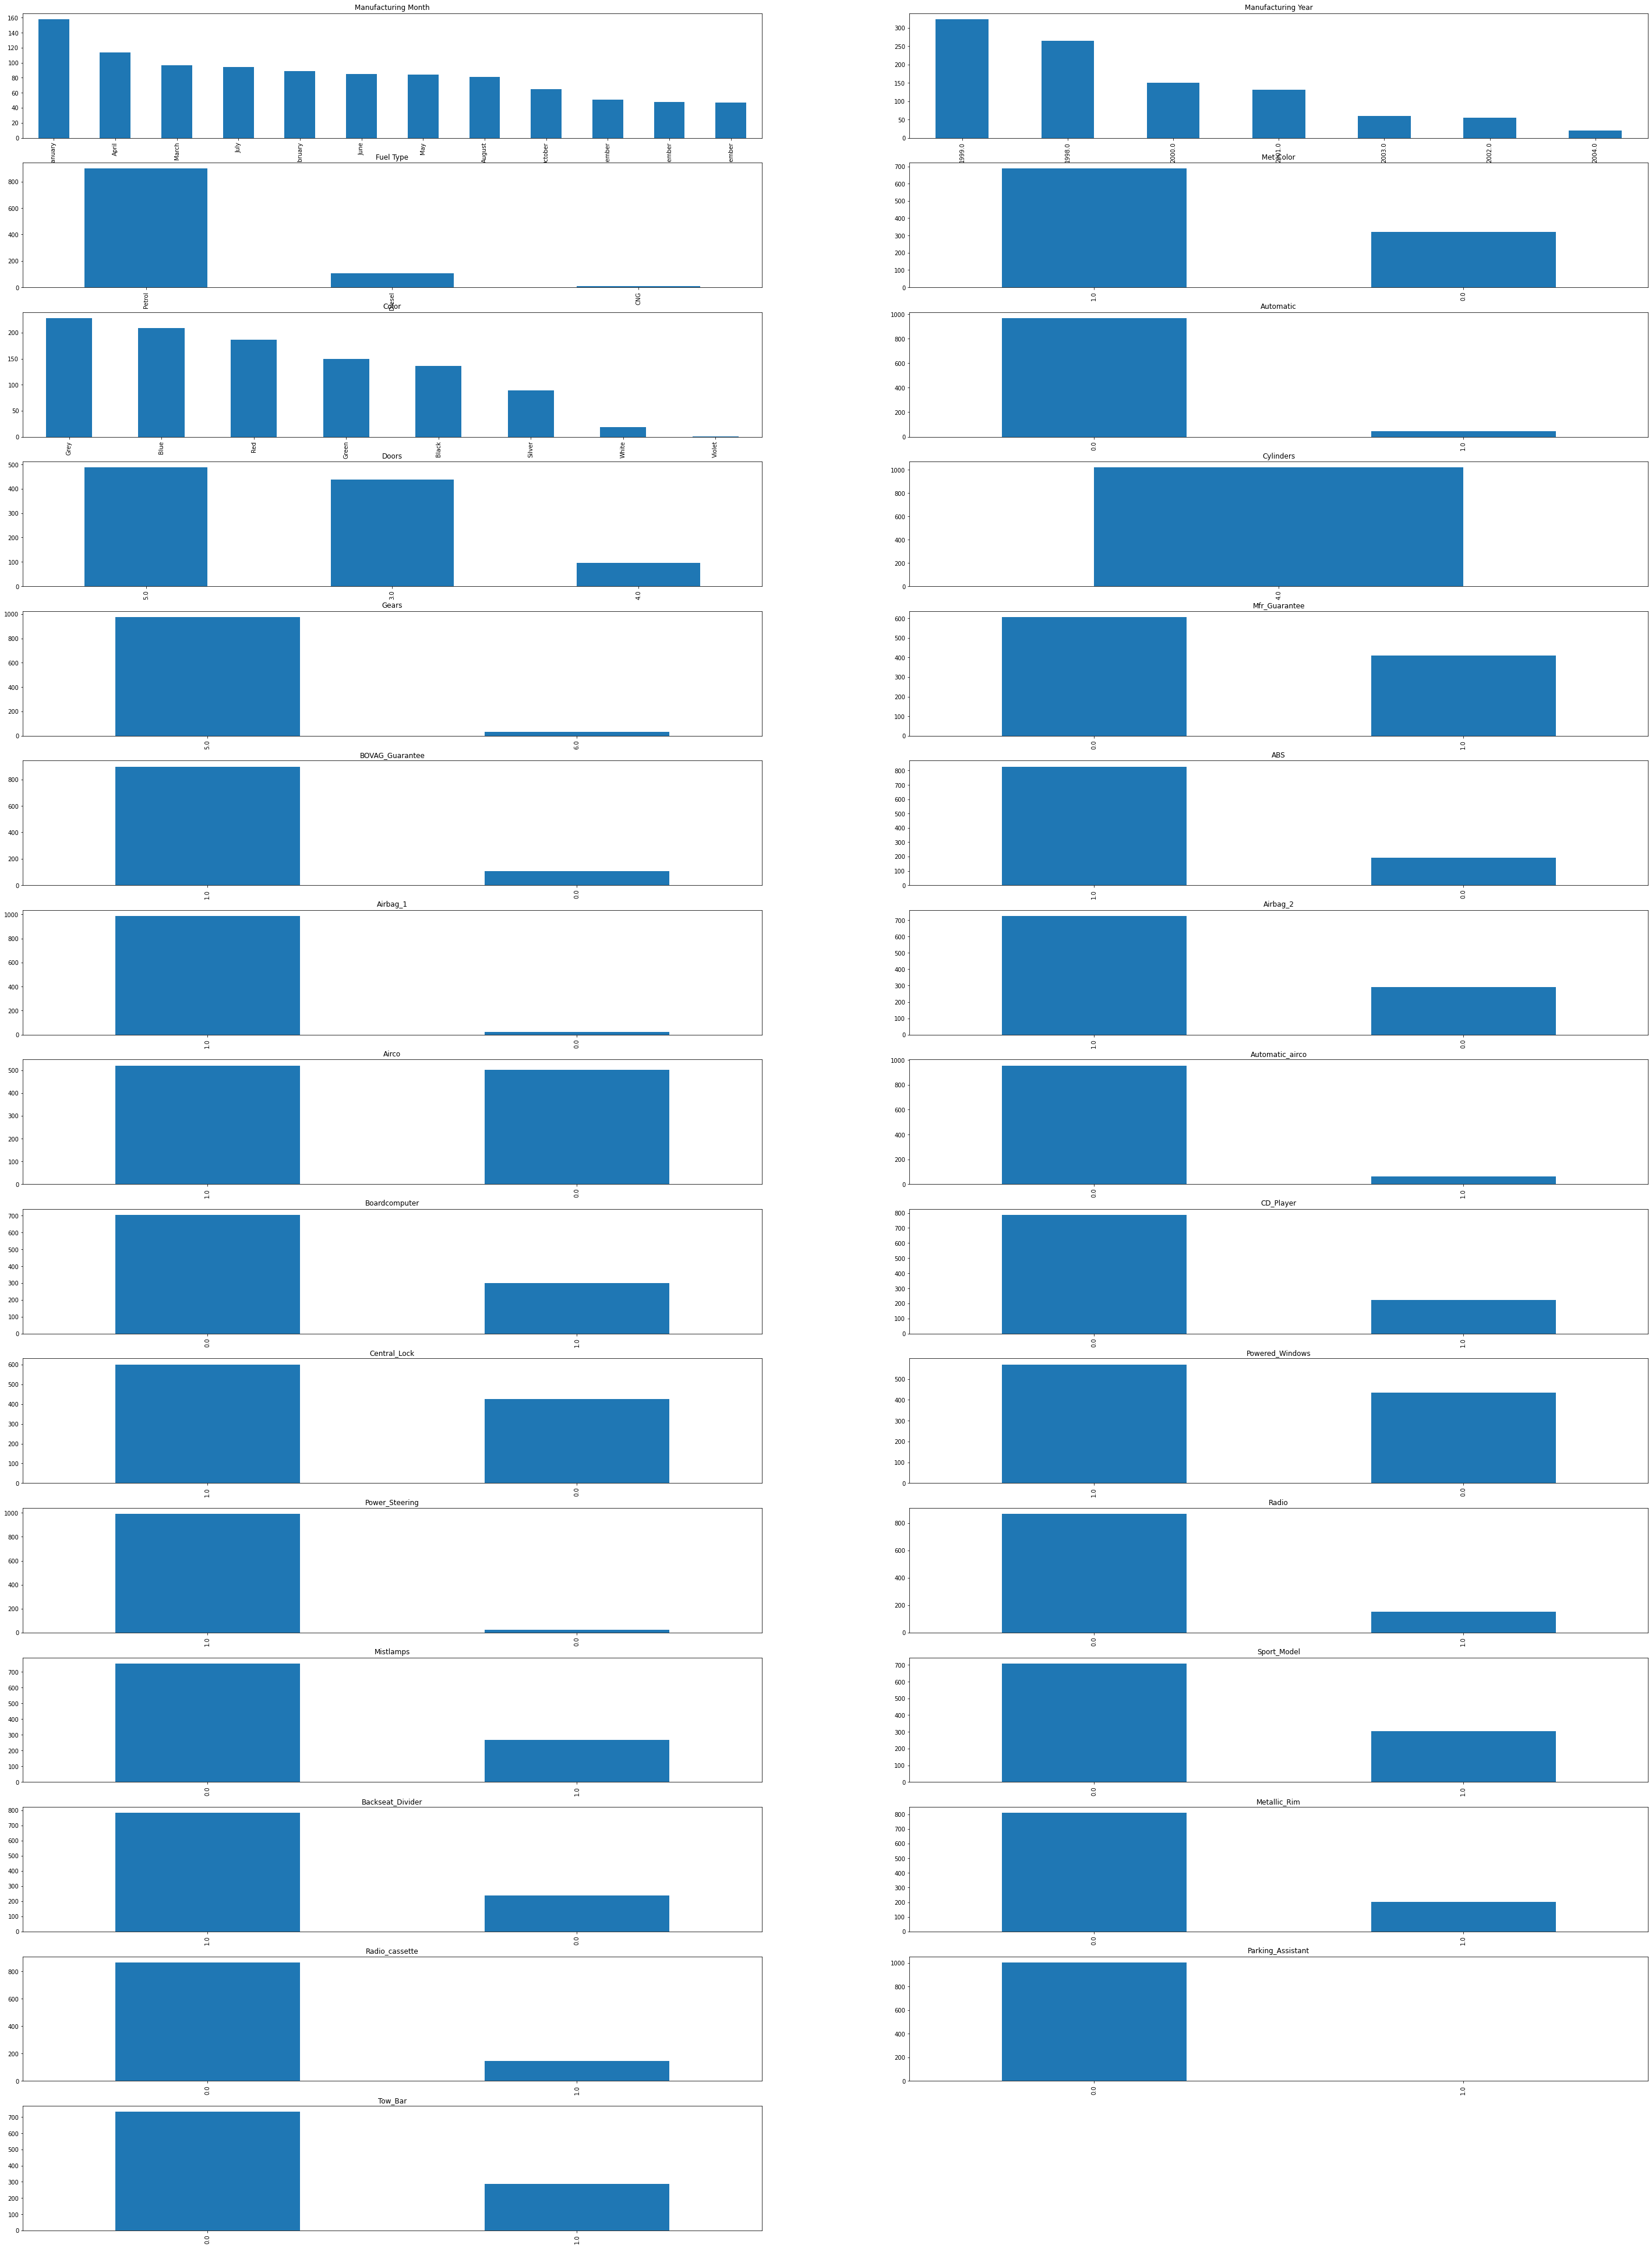

In [19]:
# Set up a grid of plots
plt.figure(figsize=(50,70)) 
fig_dims = (15 , 2)

#Plot Manufacturing Month Bar Graph
plt.subplot2grid(fig_dims, (0, 0))
train_X['Mfg_Month'].value_counts().plot(kind='bar', title='Manufacturing Month')

# Plot Manufacturing Year Bar Graph
plt.subplot2grid(fig_dims, (0, 1))
train_X['Mfg_Year'].value_counts().plot(kind='bar', title='Manufacturing Year')

# Plot Fuel Type Bar Graph
plt.subplot2grid(fig_dims, (1, 0))
train_X['Fuel_Type'].value_counts().plot(kind='bar', title='Fuel Type')

# Plot Met Color Bar Graph
plt.subplot2grid(fig_dims, (1, 1))
train_X['Met_Color'].value_counts().plot(kind='bar', title='Met Color')

# Plot Color Bar Graph
plt.subplot2grid(fig_dims, (2, 0))
train_X['Color'].value_counts().plot(kind='bar', title='Color')

# Plot Automatic Bar Graph
plt.subplot2grid(fig_dims, (2, 1))
train_X['Automatic'].value_counts().plot(kind='bar', title='Automatic')

# Plot Doors Bar Graph
plt.subplot2grid(fig_dims, (3, 0))
train_X['Doors'].value_counts().plot(kind='bar', title='Doors')

# Plot Cylinders Bar Graph
plt.subplot2grid(fig_dims, (3, 1))
train_X['Cylinders'].value_counts().plot(kind='bar', title='Cylinders')

# Plot Gears Bar Graph
plt.subplot2grid(fig_dims, (4, 0))
train_X['Gears'].value_counts().plot(kind='bar', title='Gears')

# Plot Mfr_Guarantee Bar Graph
plt.subplot2grid(fig_dims, (4, 1))
train_X['Mfr_Guarantee'].value_counts().plot(kind='bar', title='Mfr_Guarantee')

# Plot BOVAG_Guarantee Bar Graph
plt.subplot2grid(fig_dims, (5, 0))
train_X['BOVAG_Guarantee'].value_counts().plot(kind='bar', title='BOVAG_Guarantee')

# Plot ABS Bar Graph
plt.subplot2grid(fig_dims, (5, 1))
train_X['ABS'].value_counts().plot(kind='bar', title='ABS')

# Plot Airbag_1 Bar Graph
plt.subplot2grid(fig_dims, (6, 0))
train_X['Airbag_1'].value_counts().plot(kind='bar', title='Airbag_1')

# Plot Airbag_2 Bar Graph
plt.subplot2grid(fig_dims, (6, 1))
train_X['Airbag_2'].value_counts().plot(kind='bar', title='Airbag_2')

# Plot Airco Bar Graph
plt.subplot2grid(fig_dims, (7, 0))
train_X['Airco'].value_counts().plot(kind='bar', title='Airco')

# Plot Automatic_airco Bar Graph
plt.subplot2grid(fig_dims, (7, 1))
train_X['Automatic_airco'].value_counts().plot(kind='bar', title='Automatic_airco')

# Plot Boardcomputer Bar Graph
plt.subplot2grid(fig_dims, (8, 0))
train_X['Boardcomputer'].value_counts().plot(kind='bar', title='Boardcomputer')

# Plot CD_Player Bar Graph
plt.subplot2grid(fig_dims, (8, 1))
train_X['CD_Player'].value_counts().plot(kind='bar', title='CD_Player')

# Plot Central_Lock Bar Graph
plt.subplot2grid(fig_dims, (9, 0))
train_X['Central_Lock'].value_counts().plot(kind='bar', title='Central_Lock')

# Plot Powered_Windows Bar Graph
plt.subplot2grid(fig_dims, (9, 1))
train_X['Powered_Windows'].value_counts().plot(kind='bar', title='Powered_Windows')

# Plot Power_Steering Bar Graph
plt.subplot2grid(fig_dims, (10, 0))
train_X['Power_Steering'].value_counts().plot(kind='bar', title='Power_Steering')

# Plot Radio Bar Graph
plt.subplot2grid(fig_dims, (10, 1))
train_X['Radio'].value_counts().plot(kind='bar', title='Radio')

# Plot Mistlamps Bar Graph
plt.subplot2grid(fig_dims, (11, 0))
train_X['Mistlamps'].value_counts().plot(kind='bar', title='Mistlamps')

# Plot Sport_Model Bar Graph
plt.subplot2grid(fig_dims, (11, 1))
train_X['Sport_Model'].value_counts().plot(kind='bar', title='Sport_Model')

# Plot Backseat_Divider Bar Graph
plt.subplot2grid(fig_dims, (12, 0))
train_X['Backseat_Divider'].value_counts().plot(kind='bar', title='Backseat_Divider')

# Plot Metallic_Rim Bar Graph
plt.subplot2grid(fig_dims, (12, 1))
train_X['Metallic_Rim'].value_counts().plot(kind='bar', title='Metallic_Rim')

# Plot Radio_cassette Bar Graph
plt.subplot2grid(fig_dims, (13, 0))
train_X['Radio_cassette'].value_counts().plot(kind='bar', title='Radio_cassette')

# Plot Parking_Assistant Bar Graph
plt.subplot2grid(fig_dims, (13, 1))
train_X['Parking_Assistant'].value_counts().plot(kind='bar', title='Parking_Assistant')

# Plot Boardcomputer Bar Graph
plt.subplot2grid(fig_dims, (14, 0))
train_X['Tow_Bar'].value_counts().plot(kind='bar', title='Tow_Bar')




#### d) Analysis and Understanding of the Dataset For Discrete/Binary Variables:
For Discrete and Binary variables we will primarily impute missing values with the values which have the highest frequency of occurance. Lets check through each of the variables to see how we are going to impute them

1. **Manufacturing Month**: January shows the peak frequency in comparison to others so missing values will be imputed with January as a value
2. **Manufacturing Year**: Majority of the models are from the year 1999 so missing values will be imputed with 1999 as a value.
3. **Fuel Type**: We can clearly see the dominant value is Petrol so we are going to impute the missing values with Petrol as a value.
4. **Met color**: It has more occurances of 1 as the dominant value than 0 hence the missing values will be imputed with 1 as a value.
5. **Color**: Since Red, Green and Blue almost show the maximum frequency distribution, we will diving the number of appearances of NaN values to 3 and assign them Red, Green and Blue missing values.
6. **Automatic**: Majority values are 0 so the missing values will be imputed as 0
7. **Doors**: The Majority values are 5 for the doors so the missing values will be imputed with 5 as the value.
8. **Cylinders**: It has only one value so will contain 4 as the value for missing values.
9. **Gears**: Majority are 5 gears, so the missing values will be imputed with 5 as the value.
10. **Mfr_Guarantee**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.
11. **BOVAG_Guarantee**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
12. **ABS**:  1 values are higher than 0 so the missing values will be imputed with 1 as the value.
12. **Airbag_1**:  1 values are higher than 0 so the missing values will be imputed with 1 as the value.
14. **Airbag_2**:  1 values are higher than 0 so the missing values will be imputed with 1 as the value.
15. **Airco**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
16. **Automatic_airco**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
17. **Boardcomputer**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
18. **CD_Player**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
19. **Central_Lock**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
20. **Powered_Windows**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
21. **Power_Steering**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
22. **Radio**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
23. **Mistlamps**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
24. **Sport_Model**:  0 values are higher than 1 so the missing values will be imputed with 0 as the value.
25. **Backseat_Divider**: 1 values are higher than 0 so the missing values will be imputed with 1 as the value.
26. **Metallic_Rim**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.
27. **Radio_cassette**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.
28. **Parking_Assistant**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.
29. **Tow_Bar**: 0 values are higher than 1 so the missing values will be imputed with 0 as the value.


### 11) Imputing the missing values:
### For Train Dataset: 
#### a) Imputing the Continous variables with missing values
Let's pick each of the 6 variables and impute the missing values within them as we decided based on the analysis we did above in step 10.a). We will be imputing Age, KM, CC,HP, Quarterly_Tax, Weight and Guarantee Period with Median values.

In [20]:
# median imputation: Features: Age, KM, HP, Quarterly_Tax, and Weight
median_variables = ['Age_08_04', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']
for z in median_variables:
    train_X[z]= train_X[z].fillna(train_X[z].median())
    train_X[z] = train_X[z].astype(int)    
    

In [21]:
#Checking if the 6 continous variables are now having any missing values or not
#train_X.isnull().any()
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1297 to 684
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age_08_04          1068 non-null   int64  
 1   Mfg_Month          1013 non-null   object 
 2   Mfg_Year           1005 non-null   float64
 3   KM                 1068 non-null   int64  
 4   Fuel_Type          1015 non-null   object 
 5   HP                 1068 non-null   int64  
 6   Met_Color          1009 non-null   float64
 7   Color              1019 non-null   object 
 8   Automatic          1013 non-null   float64
 9   CC                 1068 non-null   int64  
 10  Doors              1021 non-null   float64
 11  Cylinders          1018 non-null   float64
 12  Gears              1008 non-null   float64
 13  Quarterly_Tax      1068 non-null   int64  
 14  Weight             1068 non-null   int64  
 15  Mfr_Guarantee      1016 non-null   float64
 16  BOVAG_Guarantee    100

#### b) Imputing the Discrete/Binary variables with missing values
Let's pick the rest of the 29 catagorical variables and impute the missing values within them as we decided based on the analysis we did above in step 10.d). We will be imputing each of these variables missing values with the values which have the maximum occurances. To do so we will be performing modal imputation.

In [22]:
# modal imputation: Features: Manufacturing Month, Manufacturing Year, Fuel Type, MetColor, Color, Doors,etc 

column_names = ['Mfg_Month','Mfg_Year', 'Fuel_Type','Met_Color', 'Color', 'Automatic','Doors', 'Cylinders', 'Gears',
          'Mfr_Guarantee','BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',
          'Boardcomputer' , 'CD_Player' , 'Central_Lock' , 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps' ,
          'Sport_Model' , 'Backseat_Divider' , 'Metallic_Rim' , 'Radio_cassette' , 'Parking_Assistant', 'Tow_Bar']
for z in column_names:
    mode_count = train_X[z].value_counts().index[0]
    train_X[z].fillna(mode_count, inplace=True)


In [23]:
### Checking for null values presence:
#train_X.isnull().any()
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1297 to 684
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age_08_04          1068 non-null   int64  
 1   Mfg_Month          1068 non-null   object 
 2   Mfg_Year           1068 non-null   float64
 3   KM                 1068 non-null   int64  
 4   Fuel_Type          1068 non-null   object 
 5   HP                 1068 non-null   int64  
 6   Met_Color          1068 non-null   float64
 7   Color              1068 non-null   object 
 8   Automatic          1068 non-null   float64
 9   CC                 1068 non-null   int64  
 10  Doors              1068 non-null   float64
 11  Cylinders          1068 non-null   float64
 12  Gears              1068 non-null   float64
 13  Quarterly_Tax      1068 non-null   int64  
 14  Weight             1068 non-null   int64  
 15  Mfr_Guarantee      1068 non-null   float64
 16  BOVAG_Guarantee    106

In [24]:
train_X.describe()

,Age_08_04,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,56.015918,1999.610487,66939.889513,102.061798,0.698502,0.042135,1566.562734,4.089888,4.0,5.029963,87.036517,1072.672285,0.382959,0.900749,3.789326,0.819288,0.976592,0.727528,0.530899,0.057116,0.281835,0.206929,0.600187,0.591760,0.978464,0.143258,0.250936,0.284644,0.779026,0.191011,0.138577,0.002809,0.267790
std,18.679428,1.529455,35586.069172,14.046379,0.459123,0.200991,180.744941,0.950199,0.0,0.170564,40.495451,53.655810,0.486336,0.299139,3.063465,0.384959,0.151267,0.445440,0.499278,0.232173,0.450104,0.405294,0.490089,0.491738,0.145229,0.350500,0.433755,0.451456,0.415097,0.393282,0.345666,0.052950,0.443015
min,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,3.000000,4.0,5.000000,19.000000,1000.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,1999.000000,43090.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,4.0,5.000000,69.000000,1043.750000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,61.000000,1999.000000,63135.000000,110.000000,1.000000,0.000000,1600.000000,4.500000,4.0,5.000000,85.000000,1070.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,2000.000000,84979.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,85.000000,1085.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,80.000000,2004.000000,232940.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,4.0,6.000000,283.000000,1615.000000,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### For Test Dataset: 
#### a) Imputing the Continous & Discrete/Binary variables with missing values
Just like we did above we will do the same steps on the test data as well.

In [25]:
# median imputation: Features: Age, KM, HP, Quarterly_Tax, Weight, and Guarantee Period.
median_variables = ['Age_08_04','KM','CC','HP', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']
for z in median_variables:
    test_X[z]= test_X[z].fillna(test_X[z].median())
    test_X[z] = test_X[z].astype(int)
    
# mode imputation: Features: Manufacturing Month, Manufacturing Year, Fuel Type, MetColor, Color, Doors,etc 

column_names = ['Mfg_Month','Mfg_Year', 'Fuel_Type','Met_Color', 'Color', 'Automatic','Doors', 'Cylinders', 'Gears',
          'Mfr_Guarantee','BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',
          'Boardcomputer' , 'CD_Player' , 'Central_Lock' , 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps' ,
          'Sport_Model' , 'Backseat_Divider' , 'Metallic_Rim' , 'Radio_cassette' , 'Parking_Assistant', 'Tow_Bar']
for z in column_names:
    mode_count = test_X[z].value_counts().index[0]
    test_X[z].fillna(mode_count, inplace=True)


In [26]:
### Checking for null values presence:
#test_X.isnull().any()
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 740 to 412
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age_08_04          357 non-null    int64  
 1   Mfg_Month          357 non-null    object 
 2   Mfg_Year           357 non-null    float64
 3   KM                 357 non-null    int64  
 4   Fuel_Type          357 non-null    object 
 5   HP                 357 non-null    int64  
 6   Met_Color          357 non-null    float64
 7   Color              357 non-null    object 
 8   Automatic          357 non-null    float64
 9   CC                 357 non-null    int64  
 10  Doors              357 non-null    float64
 11  Cylinders          357 non-null    float64
 12  Gears              357 non-null    float64
 13  Quarterly_Tax      357 non-null    int64  
 14  Weight             357 non-null    int64  
 15  Mfr_Guarantee      357 non-null    float64
 16  BOVAG_Guarantee    357 n

In [27]:
#Check if there are null values or not.
test_X.columns[test_X.isnull().any()]

Index([], dtype='object')

In [28]:
test_X.describe()

,Age_08_04,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.0,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,56.282913,1999.509804,71488.232493,101.358543,0.655462,0.072829,1614.509804,3.941176,4.0,5.022409,87.941176,1070.515406,0.417367,0.89916,3.725490,0.831933,0.957983,0.753501,0.563025,0.053221,0.268908,0.212885,0.585434,0.568627,0.980392,0.137255,0.218487,0.271709,0.798319,0.196078,0.131653,0.002801,0.243697
std,16.988796,1.456500,39204.495244,17.108880,0.475884,0.260221,785.974378,0.950702,0.0,0.148217,40.537532,44.214593,0.493817,0.30154,2.713418,0.374451,0.200909,0.431577,0.496708,0.224790,0.444014,0.409922,0.493338,0.495963,0.138843,0.344599,0.413800,0.445465,0.401818,0.397586,0.338587,0.052926,0.429915
min,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,3.000000,4.0,5.000000,19.000000,1000.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1998.000000,46449.000000,86.000000,0.000000,0.000000,1400.000000,3.000000,4.0,5.000000,69.000000,1040.000000,0.000000,1.00000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,1999.000000,63164.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,4.0,5.000000,85.000000,1065.000000,0.000000,1.00000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,2000.000000,85470.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,85.000000,1085.000000,1.000000,1.00000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,4.0,6.000000,234.000000,1270.000000,1.000000,1.00000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 12) Data Transformation of the Train and Test Datasets:
We have now completely removed all the null values and imputed them with the desired values. Now we can work on tranforming the data to make it suitable for regression models.

#### a) Data Transformation of Train Dataset 
Let us go through each categorical/ordinal/binary columns and perform data transformation by either mapping or one hot vector encoding. Columns 'Age', 'KM', 'HP', 'CC', 'Quarterly_Tax', 'Weight' and 'Guarantee Period' are continous and will not require 1 hot vector transformation. Column 'Cylinders' has only one value 4 hence we will drop this column. Rest all the 30 columns will require one hot vector transformation as they are all nominal catagorical variables.

In [29]:
#Dropping the Cylinders variable from the Train dataset
train_X.drop(columns = ['Cylinders'], axis = 1, inplace = True)
train_X

#Adding 1 hot vectors to the rest 29 feature columns:
column_names = ['Mfg_Month','Mfg_Year', 'Fuel_Type','Met_Color', 'Color', 'Automatic','Doors', 'Gears',
          'Mfr_Guarantee','BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',
          'Boardcomputer' , 'CD_Player' , 'Central_Lock' , 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps' ,
          'Sport_Model' , 'Backseat_Divider' , 'Metallic_Rim' , 'Radio_cassette' , 'Parking_Assistant', 'Tow_Bar']
for z in column_names:
    cols = pd.get_dummies(train_X[z], prefix= z)
    train_X[cols.columns] = cols
    train_X.drop(z, axis = 1, inplace = True)


In [30]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 1297 to 684
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age_08_04              1068 non-null   int64
 1   KM                     1068 non-null   int64
 2   HP                     1068 non-null   int64
 3   CC                     1068 non-null   int64
 4   Quarterly_Tax          1068 non-null   int64
 5   Weight                 1068 non-null   int64
 6   Guarantee_Period       1068 non-null   int64
 7   Mfg_Month_April        1068 non-null   uint8
 8   Mfg_Month_August       1068 non-null   uint8
 9   Mfg_Month_December     1068 non-null   uint8
 10  Mfg_Month_February     1068 non-null   uint8
 11  Mfg_Month_January      1068 non-null   uint8
 12  Mfg_Month_July         1068 non-null   uint8
 13  Mfg_Month_June         1068 non-null   uint8
 14  Mfg_Month_March        1068 non-null   uint8
 15  Mfg_Month_May          1068 non-null

In [31]:
train_X.shape

(1068, 86)

The shape of the Train dataset after transformation is 86 columns and 1068 rows

#### b) Data Transformation of Test Dataset 
Redoing the exact data transformation that we did for the Train Dataset on Test Dataset we should receive the exact number of transformed columns as 86.

In [32]:
#Dropping the Cylinder variable from the Test dataset
test_X.drop(columns = ['Cylinders'], axis = 1, inplace = True)
test_X

#Adding 1 hot vectors to the rest 29 feature columns:
column_names = ['Mfg_Month','Mfg_Year', 'Fuel_Type','Met_Color', 'Color', 'Automatic','Doors', 'Gears',
          'Mfr_Guarantee','BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco',
          'Boardcomputer' , 'CD_Player' , 'Central_Lock' , 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps' ,
          'Sport_Model' , 'Backseat_Divider' , 'Metallic_Rim' , 'Radio_cassette' , 'Parking_Assistant', 'Tow_Bar']
for z in column_names:
    cols = pd.get_dummies(test_X[z], prefix= z)
    test_X[cols.columns] = cols
    test_X.drop(z, axis = 1, inplace = True)


In [33]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 740 to 412
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age_08_04              357 non-null    int64
 1   KM                     357 non-null    int64
 2   HP                     357 non-null    int64
 3   CC                     357 non-null    int64
 4   Quarterly_Tax          357 non-null    int64
 5   Weight                 357 non-null    int64
 6   Guarantee_Period       357 non-null    int64
 7   Mfg_Month_April        357 non-null    uint8
 8   Mfg_Month_August       357 non-null    uint8
 9   Mfg_Month_December     357 non-null    uint8
 10  Mfg_Month_February     357 non-null    uint8
 11  Mfg_Month_January      357 non-null    uint8
 12  Mfg_Month_July         357 non-null    uint8
 13  Mfg_Month_June         357 non-null    uint8
 14  Mfg_Month_March        357 non-null    uint8
 15  Mfg_Month_May          357 non-null   

In [34]:
test_X.shape

(357, 86)

The shape of the Test dataset after transformation is 86 columns and 357 rows

In [35]:
test_X.head()

,Age_08_04,KM,HP,CC,Quarterly_Tax,Weight,Guarantee_Period,Mfg_Month_April,Mfg_Month_August,Mfg_Month_December,Mfg_Month_February,Mfg_Month_January,Mfg_Month_July,Mfg_Month_June,Mfg_Month_March,Mfg_Month_May,Mfg_Month_November,Mfg_Month_October,Mfg_Month_September,Mfg_Year_1998.0,Mfg_Year_1999.0,Mfg_Year_2000.0,Mfg_Year_2001.0,Mfg_Year_2002.0,Mfg_Year_2003.0,Mfg_Year_2004.0,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Met_Color_0.0,Met_Color_1.0,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Automatic_0.0,...,Mfr_Guarantee_0.0,Mfr_Guarantee_1.0,BOVAG_Guarantee_0.0,BOVAG_Guarantee_1.0,ABS_0.0,ABS_1.0,Airbag_1_0.0,Airbag_1_1.0,Airbag_2_0.0,Airbag_2_1.0,Airco_0.0,Airco_1.0,Automatic_airco_0.0,Automatic_airco_1.0,Boardcomputer_0.0,Boardcomputer_1.0,CD_Player_0.0,CD_Player_1.0,Central_Lock_0.0,Central_Lock_1.0,Powered_Windows_0.0,Powered_Windows_1.0,Power_Steering_0.0,Power_Steering_1.0,Radio_0.0,Radio_1.0,Mistlamps_0.0,Mistlamps_1.0,Sport_Model_0.0,Sport_Model_1.0,Backseat_Divider_0.0,Backseat_Divider_1.0,Metallic_Rim_0.0,Metallic_Rim_1.0,Radio_cassette_0.0,Radio_cassette_1.0,Parking_Assistant_0.0,Parking_Assistant_1.0,Tow_Bar_0.0,Tow_Bar_1.0
740,65,63164,86,1300,69,1015,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
644,68,117000,72,2000,185,1115,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
434,48,78600,110,1600,85,1075,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0
858,60,64383,86,1300,69,1015,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
141,19,21684,192,1800,19,1185,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0


#### We have imputed the missing values as well as performed data transformation. Thus, our train and test data sets are completely clean. Now, the next steps will be to perform scaling on the feature set of train and test data.

### 13) Scaling the Feature set in Train and Test Data Sets
In the following regression problem, we have seen considerable outliers which are essential values but at the same time tend to impact the variables in the Data set. We cannot use **Standar Scaler** here because majority of the data is not normally distributed and has extreme outliers. To avoid this we perform MinMaxScaler() to scale the feature set in train and test data, as **MinMaxScaler()** will transform each value in the dataset proportionally thus preserving the shape of the dataset that is not causing any distortion.


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [37]:
train_X_scaled

array([[0.94936709, 0.30067099, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.50632911, 0.12756559, 0.38211382, ..., 0.        , 0.        ,
        1.        ],
       [0.78481013, 0.49368719, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.92405063, 0.36113317, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.75949367, 0.16699222, 0.22764228, ..., 0.        , 1.        ,
        0.        ],
       [0.83544304, 0.42835249, 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [38]:
test_X_scaled

array([[0.81012658, 0.27115683, 0.13821138, ..., 0.        , 0.        ,
        1.        ],
       [0.84810127, 0.50227313, 0.02439024, ..., 0.        , 1.        ,
        0.        ],
       [0.59493671, 0.3374231 , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.97468354, 0.27115683, 0.13821138, ..., 0.        , 0.        ,
        1.        ],
       [0.89873418, 0.4555141 , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.6835443 , 0.41741829, 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [39]:
# Convert array back to dataframe
from pandas import DataFrame
X_train_scaled = DataFrame(train_X_scaled)

In [40]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1068 non-null   float64
 1   1       1068 non-null   float64
 2   2       1068 non-null   float64
 3   3       1068 non-null   float64
 4   4       1068 non-null   float64
 5   5       1068 non-null   float64
 6   6       1068 non-null   float64
 7   7       1068 non-null   float64
 8   8       1068 non-null   float64
 9   9       1068 non-null   float64
 10  10      1068 non-null   float64
 11  11      1068 non-null   float64
 12  12      1068 non-null   float64
 13  13      1068 non-null   float64
 14  14      1068 non-null   float64
 15  15      1068 non-null   float64
 16  16      1068 non-null   float64
 17  17      1068 non-null   float64
 18  18      1068 non-null   float64
 19  19      1068 non-null   float64
 20  20      1068 non-null   float64
 21  21      1068 non-null   float64
 22  

In [41]:
# Convert array back to dataframe
from pandas import DataFrame
X_test_scaled = DataFrame(test_X_scaled)

In [42]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       357 non-null    float64
 1   1       357 non-null    float64
 2   2       357 non-null    float64
 3   3       357 non-null    float64
 4   4       357 non-null    float64
 5   5       357 non-null    float64
 6   6       357 non-null    float64
 7   7       357 non-null    float64
 8   8       357 non-null    float64
 9   9       357 non-null    float64
 10  10      357 non-null    float64
 11  11      357 non-null    float64
 12  12      357 non-null    float64
 13  13      357 non-null    float64
 14  14      357 non-null    float64
 15  15      357 non-null    float64
 16  16      357 non-null    float64
 17  17      357 non-null    float64
 18  18      357 non-null    float64
 19  19      357 non-null    float64
 20  20      357 non-null    float64
 21  21      357 non-null    float64
 22  22

## <font color='green'>Machine Learning Regression Models
#### We will now start to use our train and test datasets to work on different Regression Models below, before that we import some of the important libraries required for the Regression Models

## Bagging

### 1) K Neighbors Regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor(n_neighbors=6)
model_KNN.fit(X_train_scaled, train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [44]:
from sklearn.ensemble import BaggingRegressor

bag_KNN = BaggingRegressor(model_KNN, n_estimators=5000,max_samples=100,bootstrap=True,n_jobs=-1,random_state=0,oob_score=True)

bag_KNN.fit(X_train_scaled, train_Y)
y_pred = bag_KNN.predict(X_test_scaled)

In [45]:
# Reporting the training and testing scores for the bagging classifier

print("The train score is: {:.4f} ".format(bag_KNN.score(X_train_scaled, train_Y)))
print("The test score is: {:.4f} ".format(bag_KNN.score(X_test_scaled, test_Y)))
train_score = bag_KNN.score(X_train_scaled, train_Y)
test_score = bag_KNN.score(X_test_scaled, test_Y)
difference = test_score - train_score

The train score is: 0.7235 
The test score is: 0.6697 


In [46]:
# Capturing the Parameters in a Data Frame:
bag_KNNR_list = [train_score, test_score, difference]
KNNR_bagging = pd.DataFrame(bag_KNNR_list)
KNNR_bagging

,0
0,0.723489
1,0.669690
2,-0.053798


### 2) Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor(random_state=0)
bag_DT = BaggingRegressor(model_DT,n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,random_state=0,oob_score=True)

In [48]:
bag_DT.fit(X_train_scaled, train_Y)
y_pred = bag_DT.predict(X_test_scaled)

In [49]:
print("OOB score is {:.4f}".format(bag_DT.oob_score_))

OOB score is 0.8657


In [50]:
# Reporting the training and testing scores for the bagging classifier

print("The train score is: {:.4f} ".format(bag_DT.score(X_train_scaled, train_Y)))
print("The test score is: {:.4f} ".format(bag_DT.score(X_test_scaled, test_Y)))
train_score = bag_DT.score(X_train_scaled, train_Y)
test_score = bag_DT.score(X_test_scaled, test_Y)
difference = test_score - train_score

The train score is: 0.8884 
The test score is: 0.8111 


In [51]:
# Capturing the Parameters in a Data Frame:
DTree_Bagging_list = [train_score, test_score, difference]
DTree_Bagging = pd.DataFrame(DTree_Bagging_list)
DTree_Bagging

,0
0,0.888392
1,0.811130
2,-0.077261


## Pasting

### 1) K Neighbors Regressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor

model_KNN = KNeighborsRegressor(n_neighbors=6)
model_KNN.fit(X_train_scaled, train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [53]:
from sklearn.ensemble import BaggingRegressor

paste_KNN = BaggingRegressor(model_KNN, n_estimators=5000,max_samples=100,bootstrap=False,n_jobs=-1,random_state=0)

paste_KNN.fit(X_train_scaled, train_Y)
y_pred = paste_KNN.predict(X_test_scaled)

In [54]:
# Reporting the training and testing scores for the bagging classifier

print("The train score is: {:.4f} ".format(paste_KNN.score(X_train_scaled, train_Y)))
print("The test score is: {:.4f} ".format(paste_KNN.score(X_test_scaled, test_Y)))
train_score = paste_KNN.score(X_train_scaled, train_Y)
test_score = paste_KNN.score(X_test_scaled, test_Y)
difference = test_score - train_score

The train score is: 0.7241 
The test score is: 0.6709 


In [55]:
# Capturing the Parameters in a Data Frame:
KNNR_Paste_list = [train_score, test_score, difference]
KNNR_Paste = pd.DataFrame(KNNR_Paste_list)
KNNR_Paste

,0
0,0.724064
1,0.670941
2,-0.053123


### 2) Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor(random_state=0)
paste_DT = BaggingRegressor(model_DT, n_estimators=500,max_samples=100,bootstrap=False,n_jobs=-1,random_state=0)

In [57]:
paste_DT.fit(X_train_scaled, train_Y)
y_pred = paste_DT.predict(X_test_scaled)

In [58]:
# Reporting the training and testing scores for the bagging classifier

print("The train score is: {:.4f} ".format(paste_DT.score(X_train_scaled, train_Y)))
print("The test score is: {:.4f} ".format(paste_DT.score(X_test_scaled, test_Y)))
train_score = paste_DT.score(X_train_scaled, train_Y)
test_score = paste_DT.score(X_test_scaled, test_Y)
difference = test_score - train_score

The train score is: 0.8886 
The test score is: 0.8159 


In [59]:
# Capturing the Parameters in a Data Frame:
DTree_Paste_list = [train_score, test_score, difference]
DTree_Paste = pd.DataFrame(DTree_Paste_list)
DTree_Paste

,0
0,0.888604
1,0.815917
2,-0.072687


## Adaboost

### 1) K Neighbors Regressor

In [60]:
from sklearn.ensemble import AdaBoostRegressor

ada_KNN = AdaBoostRegressor(model_KNN, n_estimators=500, learning_rate=0.5, random_state=0)
ada_KNN.fit(X_train_scaled, train_Y)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=6,
                                                     p=2, weights='uniform'),
                  learning_rate=0.5, loss='linear', n_estimators=500,
                  random_state=0)

In [61]:
# Reporting the training and testing scores for the bagging classifier

print("The train score is: {:.4f} ".format(ada_KNN.score(X_train_scaled, train_Y)))
print("The test score is: {:.4f} ".format(ada_KNN.score(X_test_scaled, test_Y)))
train_score = ada_KNN.score(X_train_scaled, train_Y)
test_score = ada_KNN.score(X_test_scaled, test_Y)
difference = test_score - train_score

The train score is: 0.9265 
The test score is: 0.6095 


In [62]:
# Capturing the Parameters in a Data Frame:
KNNR_Ada_list = [train_score, test_score, difference]
KNNR_Ada = pd.DataFrame(KNNR_Ada_list)
KNNR_Ada

,0
0,0.926486
1,0.609464
2,-0.317022


### 2) Decision Tree Regressor

In [63]:
ada_DT = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=500, learning_rate=0.5, random_state=0)
ada_DT.fit(X_train_scaled, train_Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=1,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [64]:
# Reporting the training and testing scores for the bagging classifier

print("The train score is: {:.4f} ".format(ada_DT.score(X_train_scaled, train_Y)))
print("The test score is: {:.4f} ".format(ada_DT.score(X_test_scaled, test_Y)))
train_score = ada_DT.score(X_train_scaled, train_Y)
test_score = ada_DT.score(X_test_scaled, test_Y)
difference = test_score - train_score

The train score is: 0.5377 
The test score is: 0.3378 


In [65]:
# Capturing the Parameters in a Data Frame:
DTree_Ada_list = [train_score, test_score, difference]
DTree_Ada = pd.DataFrame(DTree_Ada_list)
DTree_Ada

,0
0,0.537749
1,0.337788
2,-0.199961


## Gradient Boosting

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'max_depth':[1,2,3,4,5],
              'learning_rate':[0.01,0.1,0.5,0.75,1],
              'random_state':[0]}
grad_boost = GridSearchCV(GradientBoostingRegressor(),param_grid,n_jobs=-1,cv=3,return_train_score=True)

In [67]:
grad_boost.fit(X_train_scaled, train_Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [68]:
print("Best Parameters: {} ".format(grad_boost.best_params_))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'random_state': 0} 


In [69]:
grad_boost = GradientBoostingRegressor(max_depth=4, n_estimators=5, learning_rate=0.1, random_state=0)
grad_boost.fit(X_train_scaled, train_Y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [70]:
# Reporting the training and testing scores for the bagging classifier

print("The train score is: {:.4f} ".format(grad_boost.score(X_train_scaled, train_Y)))
print("The test score is: {:.4f} ".format(grad_boost.score(X_test_scaled, test_Y)))
train_score = grad_boost.score(X_train_scaled, train_Y)
test_score = grad_boost.score(X_test_scaled, test_Y)
difference = test_score - train_score

The train score is: 0.5839 
The test score is: 0.5239 


In [71]:
# Capturing the Parameters in a Data Frame:
Gradient_Boost_list = [train_score, test_score, difference]
Gradient_Boost = pd.DataFrame(Gradient_Boost_list)
Gradient_Boost

,0
0,0.583895
1,0.523924
2,-0.059971


## <font color='green'> Conclusion - Ensemble/ Models

### Displaying the combined results of all the Ensemble models

In [72]:
#Combining the Captured Datasets into one DF
Reg = pd.concat([ KNNR_bagging, DTree_Bagging, KNNR_Paste, DTree_Paste, KNNR_Ada, DTree_Ada, Gradient_Boost], axis = 1)
Reg.columns =['Bagging KNNR', 'Bagging DTree', 'Paste KNN', 'Paste DTree', 'Ada KNN', 'Ada DTree', 'Grad Boost'] 
Reg.rows = ['Train Score', 'Test Score', 'Difference']
Reg

,Bagging KNNR,Bagging DTree,Paste KNN,Paste DTree,Ada KNN,Ada DTree,Grad Boost
0,0.723489,0.888392,0.724064,0.888604,0.926486,0.537749,0.583895
1,0.669690,0.811130,0.670941,0.815917,0.609464,0.337788,0.523924
2,-0.053798,-0.077261,-0.053123,-0.072687,-0.317022,-0.199961,-0.059971


#### As per the table above we can see that the best Ensemble models best fit for the ToyotaCorola Dataset are the <mark style="background-color: lightblue">Bagging Decision Tree and Paste Decision Tree </mark> with almost near Training = 0.888 and Test Score = 0.811 and Difference of 0.07 Hence SGD Regressor is the best fit for the ToyotaCorola Dataset.

## Dimension Reduction using the Principal Component Analaysis (PCA)

##### We will reduce the Dimension of the Data frame and later run all the Regression models using the reduced dataset.

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state = 0)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [74]:
pca.n_components_

37

##### Here we can see the original dataset had 86 values and PCA has reduced the dimension to 37.

## Running all the models after PCA

### 1) K Neighbors Regressor

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_neighbours = { 'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [76]:
#Performing Cross validation on the data set.
Grid_KNN = GridSearchCV(KNeighborsRegressor(),knn_neighbours,cv=10,return_train_score=True)
Grid_KNN.fit(X_train_pca, train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [77]:
# Finding out the best parameters for the model

print("Best cross-validation score for the model is: {:.4f}".format(Grid_KNN.best_score_))
print('Best parameters are: ', Grid_KNN.best_params_)
print('Best estimator is: ', Grid_KNN.best_estimator_)

best_cvscore = format(Grid_KNN.best_score_)
best_param = format(Grid_KNN.best_params_)

Best cross-validation score for the model is: 0.7723
Best parameters are:  {'n_neighbors': 6}
Best estimator is:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')


##### Here the best score that we get for Cross validation is 0.7723 with K = 6 

In [78]:
# Reporting the training and testing scores for the best model

print("The train score is: {:.4f} ".format(Grid_KNN.score(X_train_pca, train_Y)))
print("The test score is: {:.4f} ".format(Grid_KNN.score(X_test_pca, test_Y)))
train_score = Grid_KNN.score(X_train_pca, train_Y)
test_score = Grid_KNN.score(X_test_pca, test_Y)
difference = train_score - test_score
print("The test score is: {:.4f} ", difference)

The train score is: 0.8414 
The test score is: 0.7127 
The test score is: {:.4f}  0.12866371338765592


##### The train score is 0.8414 but the test score is 0.7127, the test score is lesser than the train score with a difference of 0.1287

### 2) Linear Regression using Normal Equation

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train_pca, train_Y)
score = cross_val_score(lreg,X_train_pca, train_Y,cv=10)
print("The Best cross validation score is: {:.4f}".format(score.mean()))
print("{:.4f}".format(lreg.score(X_train_pca, train_Y)))
print("{:.4f}".format(lreg.score(X_test_pca, test_Y)))

best_cvscore = format(score.mean())
best_param = 'NA'
train_score = lreg.score(X_train_pca, train_Y)
test_score = lreg.score(X_test_pca, test_Y)
difference = train_score - test_score
print("The test score is: {:.4f} ", difference)

The Best cross validation score is: 0.7818
0.8016
0.7215
The test score is: {:.4f}  0.08003671309678095


##### The train score is 0.8016 but the test score is 0.7215, the test score is lesser than the train score with a difference of 0.0801

### 3) Ridge Regression

In [80]:
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge

param_grid = {'alpha':[0.001,0.01, 0.1, 1, 10, 100,1000]}

In [81]:
Grid_Ridge = GridSearchCV(Ridge(),param_grid,cv=10,return_train_score=True)
Grid_Ridge.fit(X_train_pca,train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [82]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_Ridge.best_score_))
print('Best Paramater:',Grid_Ridge.best_params_)
best_cvscore = Grid_Ridge.best_score_
best_param = Grid_Ridge.best_params_


Best Cross-Validation Score: 0.7821
Best Paramater: {'alpha': 10}


##### Here we can see that with alpha = 10 the Cross Validation score is 0.7821

In [83]:
# Reporting the training and testing scores for the best model

print("Best Training score: {:.4f}".format(Grid_Ridge.score(X_train_pca,train_Y)))
print("Best Testing score: {:.4f}".format(Grid_Ridge.score(X_test_pca, test_Y)))
train_score = Grid_Ridge.score(X_train_pca,train_Y)
test_score = Grid_Ridge.score(X_test_pca, test_Y)
difference = train_score - test_score
print("The test score is: {:.4f} ", difference)

Best Training score: 0.8001
Best Testing score: 0.7304
The test score is: {:.4f}  0.06961336252009587


##### The train score is 0.8001 but the test score is 0.7304, the test score is comparitively lesser than the train score with a marginal difference of 0.0697

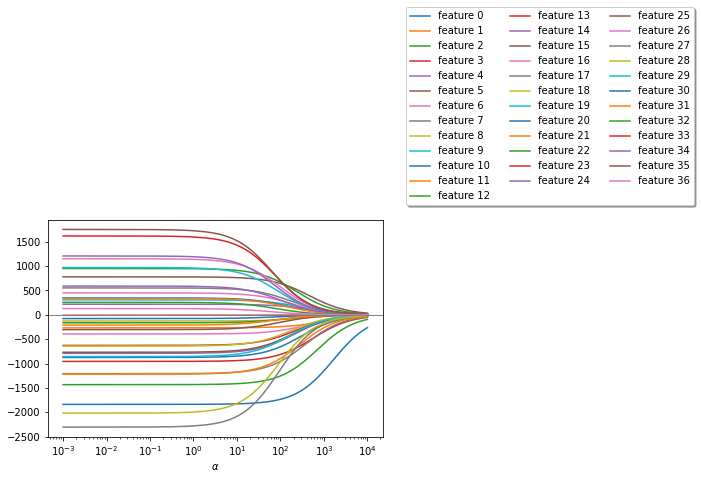

In [84]:
#Plotting the Ridge Regression lines for each of the feature values in the X PCA dataset.
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_pca,train_Y)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,37):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 2),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### 4) LASSO Regression

In [85]:
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Lasso

param_grid = {'alpha':[0.001,0.01, 0.1, 1, 10, 100,1000]}

In [86]:
Grid_Lasso = GridSearchCV(Lasso(),param_grid,cv=10,return_train_score=True)
Grid_Lasso.fit(X_train_pca,train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [87]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_Lasso.best_score_))
print('Best Paramater:',Grid_Lasso.best_params_)
best_cvscore = Grid_Lasso.best_score_
best_param = Grid_Lasso.best_params_

Best Cross-Validation Score: 0.7824
Best Paramater: {'alpha': 10}


##### We can see that with alpha = 10 the Cross Validation score is 0.7824

In [88]:
# Reporting the training and testing scores for the best model

print("Best Training score: {:.4f}".format(Grid_Lasso.score(X_train_pca,train_Y)))
print("Best Testing score: {:.4f}".format(Grid_Lasso.score(X_test_pca, test_Y)))
train_score = Grid_Lasso.score(X_train_pca,train_Y)
test_score = Grid_Lasso.score(X_test_pca, test_Y)
difference = train_score - test_score
print("The test score is: {:.4f} ", difference)

Best Training score: 0.7998
Best Testing score: 0.7261
The test score is: {:.4f}  0.07368876256725143


##### The train score is 0.7998 but the test score is 0.7261, the test score is comparitively lesser than the train score with a marginal difference of 0.0737

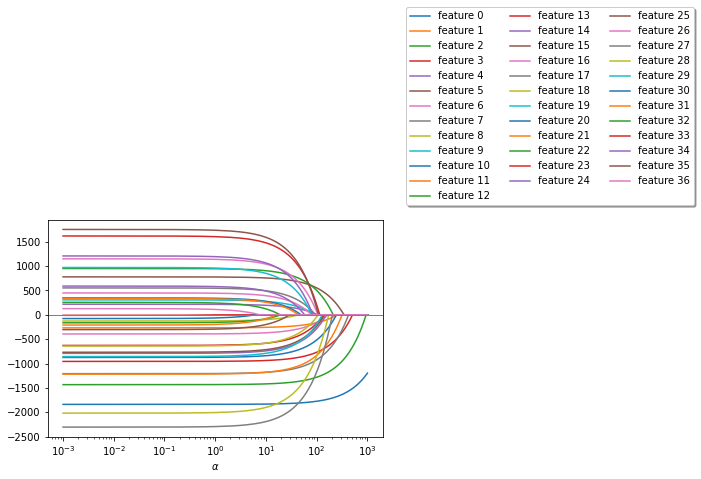

In [89]:
#Plotting the LASSO Regression lines for each of the feature values in the X dataset.
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_pca,train_Y)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,37):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 2),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### 5) Polynomial Regression

In [90]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid = {'polynomialfeatures__degree':[1,2,3]}

In [91]:
pipeline = make_pipeline(PolynomialFeatures(),LinearRegression())

In [92]:
Grid_Poly = GridSearchCV(pipeline,param_grid,cv=10,return_train_score=True)
Grid_Poly.fit(X_train_pca,train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'polynomialfeatures__degree': [1, 2, 3]},
             pre_dispatch='2*n_jobs', ref

In [93]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_Poly.best_score_))
print('Best Paramater:',Grid_Poly.best_params_)
best_cvscore = Grid_Poly.best_score_
best_param = Grid_Poly.best_params_

Best Cross-Validation Score: 0.7818
Best Paramater: {'polynomialfeatures__degree': 1}


##### We can see that with the polynomial degree = 1 the Cross Validation score is 0.7818

In [94]:
# Reporting the training and testing scores for the best model

print("Best Training score: {:.4f}".format(Grid_Poly.score(X_train_pca,train_Y)))
print("Best Testing score: {:.4f}".format(Grid_Poly.score(X_test_pca,test_Y)))
train_score = Grid_Poly.score(X_train_pca,train_Y)
test_score = Grid_Poly.score(X_test_pca,test_Y)
difference = train_score - test_score
print("The test score is: {:.4f} ".format(difference))

Best Training score: 0.8016
Best Testing score: 0.7215
The test score is: 0.0800 


##### The train score is 0.8061 but the test score is 0.7215, the test score is lesser than the train score with a difference of 0.0801. 

### 6) Linear SVM Regression

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'tol':[1]}

Grid_LSVC = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True,scoring='r2')
Grid_LSVC.fit(X_train_pca,train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'tol': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [96]:
# Finding out the best parameters for the model

print("Best Cross-Validation Score: {:.4f}".format(Grid_LSVC.best_score_))
print('Best Paramater:',Grid_LSVC.best_params_)
best_cvscore = Grid_LSVC.best_score_
best_param = Grid_LSVC.best_params_

Best Cross-Validation Score: 0.7356
Best Paramater: {'C': 100, 'tol': 1}


##### With Parameter C = 100, tol = 1, the Cross-Validation Score is 0.7229

In [97]:
# Reporting the training and testing scores for the best model

print("Best Training score :{:.4f}".format(Grid_LSVC.score(X_train_pca,train_Y)))
print("Best Testing score: {:.4f}".format(Grid_LSVC.score(X_test_pca,test_Y)))
train_score = Grid_LSVC.score(X_train_pca,train_Y)
test_score = Grid_LSVC.score(X_test_pca,test_Y)
test_score = Grid_Poly.score(X_test_pca,test_Y)
difference = train_score - test_score
print("The difference is: {:.4f} ".format(difference))

Best Training score :0.7412
Best Testing score: 0.7269
The difference is: 0.0196 


##### The train score is 0.7047 and the test score is 0.6910 for the best chosen C Parameter with a marginal difference of 0.0137.

### 7) SVM with Linear Kernel

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [99]:
Grid_LK = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=10, return_train_score=True)
Grid_LK.fit(X_train_pca,train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [100]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_LK.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_LK.best_score_))
best_cvscore = Grid_LK.best_score_
best_param = Grid_LK.best_params_

Best parameters: {'C': 100}
Best cross-validation score: 0.7742


##### With Parameter C = 100 the Cross-Validation Score is 0.7742

In [101]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_LK.score(X_train_pca,train_Y)))
print("Best testing score: {:.4f}".format(Grid_LK.score(X_test_pca,test_Y)))
train_score = Grid_LK.score(X_train_pca,train_Y)
test_score = Grid_LK.score(X_test_pca,test_Y)
test_score = Grid_Poly.score(X_test_pca,test_Y)
difference = train_score - test_score
print("The difference is: {:.4f} ".format(difference))

Best training score: 0.7857
Best testing score: 0.7416
The difference is: 0.0642 


##### The train score is 0.7857 and the test score is 0.7416 for the best chosen C Parameter with a marginal difference of 0.0642.

### 8) SVM with Poly Kernel

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [103]:
Grid_PK = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv=10, return_train_score=True)
Grid_PK.fit(X_train_pca,train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [104]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_PK.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_PK.best_score_))
best_cvscore = Grid_PK.best_score_
best_param = Grid_PK.best_params_

Best parameters: {'C': 100}
Best cross-validation score: 0.3509


##### With Parameter C = 100 the Cross-Validation Score is -0.0582

In [105]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_PK.score(X_train_pca,train_Y)))
print("Best testing score: {:.4f}".format(Grid_PK.score(X_test_pca,test_Y)))
train_score = Grid_PK.score(X_train_pca,train_Y)
test_score = Grid_PK.score(X_test_pca,test_Y)
test_score = Grid_Poly.score(X_test_pca,test_Y)
difference = train_score - test_score
print("The difference is: {:.4f} ".format(difference))

Best training score: 0.4115
Best testing score: 0.4016
The difference is: -0.3100 


##### The train score is -0.0467 and the test score is -0.0231 for the best chosen C Parameter with a marginal difference of 0.024. As compared to the previous models run so far, SVM with Poly Kernal creates the worst underfit for the dataset for the regression models.

### 9) SVM with RBF Kernel

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [107]:
Grid_RK = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv=10, return_train_score=True)
Grid_RK.fit(X_train_pca,train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [108]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_RK.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_RK.best_score_))
best_cvscore = Grid_RK.best_score_
best_param = Grid_RK.best_params_

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.3895


##### With Parameter C = 100 , gamma = 0.1, the Cross-Validation Score is 0.3895

In [109]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_RK.score(X_train_pca,train_Y)))
print("Best testing score: {:.4f}".format(Grid_RK.score(X_test_pca,test_Y)))
train_score = Grid_RK.score(X_train_pca,train_Y)
test_score = Grid_RK.score(X_test_pca,test_Y)
difference = train_score - test_score
print("The difference is: {:.4f} ".format(difference))

Best training score: 0.4264
Best testing score: 0.4274
The difference is: -0.0010 


##### The train score is 0.4264 and the test score is 0.4272 for the best chosen C and gamma Parameter with a marginal difference of 0.001. As compared to the previous models run so far, SVM with RBF Kernal has very less performance difference between the test and the train scores but the score for them are very less in comparison to other models.

### 10) Decision Tree Regressor

In [110]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {"max_leaf_nodes": range(2,6),
              "min_samples_split": range(2,10,1),
              "max_depth": [1,2,3,4]
           }

In [111]:
dreg = DecisionTreeRegressor(random_state=0)
Grid_dtree = GridSearchCV(dreg, param_grid, cv=10, return_train_score = True)
Grid_dtree.fit(X_train_pca,train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_leaf_nodes': range(2, 6),
                         'min_samples_split': range(2, 10)},
             pre_dispatch='2*n_jo

In [112]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_dtree.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_dtree.best_score_))
best_cvscore = Grid_dtree.best_score_
best_param = Grid_dtree.best_params_

Best parameters: {'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 2}
Best cross-validation score: 0.3746


##### With Parameter max_depth = 3, max_leaf_nodes= 5 and min_samples_split = 2, the Cross-Validation Score is 0.3744

In [113]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_dtree.score(X_train_pca,train_Y)))
print("Best testing score: {:.4f}".format(Grid_dtree.score(X_test_pca,test_Y)))
train_score = Grid_dtree.score(X_train_pca,train_Y)
test_score = Grid_dtree.score(X_test_pca,test_Y)
difference = train_score - test_score
print("The difference is: {:.4f} ".format(difference))

Best training score: 0.5252
Best testing score: 0.3580
The difference is: 0.1672 


##### The train score is 0.5252 and the test score is 0.3580 for the best chosen depth, leaf nodes and sample splits as mentioned above with a marginal difference of 0.1672. As compared to the previous models run so far, Decision Tree Regressor has comparitively less performance difference between the test and the train scores but the score for them are very less.

### 11) SGD Regressor

In [114]:
from sklearn.linear_model import SGDRegressor

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1','l2'],
              'eta0':[0.01,0.05,0.1,0.5]}

In [115]:
Grid_SGD = GridSearchCV(SGDRegressor(max_iter=10000),param_grid,cv=10,return_train_score=True)
Grid_SGD.fit(X_train_pca,train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=10000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'eta0': [0.01, 0.05, 0.1, 0.5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [116]:
# Finding out the best parameters for the model

print("Best parameters: {}".format(Grid_SGD.best_params_))
print("Best cross-validation score: {:.4f}".format(Grid_SGD.best_score_))
best_cvscore = Grid_SGD.best_score_
best_param = Grid_SGD.best_params_

Best parameters: {'alpha': 0.001, 'eta0': 0.01, 'penalty': 'l2'}
Best cross-validation score: 0.7824


In [117]:
# Reporting the training and testing scores for the best model

print("Best training score: {:.4f}".format(Grid_SGD.score(X_train_pca,train_Y)))
print("Best testing score: {:.4f}".format(Grid_SGD.score(X_test_pca,test_Y)))
train_score = Grid_SGD.score(X_train_pca,train_Y)
test_score = Grid_SGD.score(X_test_pca,test_Y)
difference = train_score - test_score
print("The difference is: {:.4f} ".format(difference))

Best training score: 0.8015
Best testing score: 0.7241
The difference is: 0.0774 


##### The train score is 0.8009 and the test score is 0.7195 for the best chosen alpha, eta0 and penalty values as mentioned above with a marginal difference of 0.0814. 

## Deep Learning

In [118]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

#### 1) Deep learning on original datasets (without PCA)

In [137]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=86, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [144]:
# Compile model
model.compile(loss='mae', optimizer='sgd' , metrics = ['mae'])

In [145]:
model.fit(X_train_scaled, train_Y, epochs = 100, batch_size = 20)

Epoch 1/100
54/54 [==============================] - 0s 927us/step - loss: 915.8416 - mae: 915.8416
Epoch 2/100
54/54 [==============================] - 0s 965us/step - loss: 917.9111 - mae: 917.9111
Epoch 3/100
54/54 [==============================] - 0s 845us/step - loss: 917.7434 - mae: 917.7434
Epoch 4/100
54/54 [==============================] - 0s 861us/step - loss: 924.7687 - mae: 924.7687
Epoch 5/100
54/54 [==============================] - 0s 851us/step - loss: 907.7501 - mae: 907.7501
Epoch 6/100
54/54 [==============================] - 0s 884us/step - loss: 895.3901 - mae: 895.3901
Epoch 7/100
54/54 [==============================] - 0s 1ms/step - loss: 906.5305 - mae: 906.5305
Epoch 8/100
54/54 [==============================] - 0s 1ms/step - loss: 912.8050 - mae: 912.8050
Epoch 9/100
54/54 [==============================] - 0s 916us/step - loss: 896.9355 - mae: 896.9355
Epoch 10/100
54/54 [==============================] - 0s 870us/step - loss: 900.9602 - mae: 900.9602
Epo

In [146]:
model.evaluate(X_test_scaled, test_Y)

12/12 [==============================] - 0s 1ms/step - loss: 942.1901 - mae: 942.1901


[942.1901245117188, 942.1901245117188]

In [147]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train_scaled)
y_test_predict = model.predict(X_test_scaled)

print('Train score: {:.2f}'.format(r2_score(train_Y, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(test_Y, y_test_predict)))

Train score: 0.89
Test score: 0.86


#### 2) Deep Learning on reduced datasets (with PCA)

In [149]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=37, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [150]:
# Compile model
model.compile(loss='mae', optimizer='sgd' , metrics = ['mae'])

In [151]:
model.fit(X_train_pca, train_Y, epochs = 100, batch_size = 20)

Epoch 1/100
54/54 [==============================] - 0s 865us/step - loss: 10801.1953 - mae: 10801.1953
Epoch 2/100
54/54 [==============================] - 0s 1ms/step - loss: 10800.5947 - mae: 10800.5947
Epoch 3/100
54/54 [==============================] - 0s 1ms/step - loss: 10799.9424 - mae: 10799.9424
Epoch 4/100
54/54 [==============================] - 0s 861us/step - loss: 10799.1445 - mae: 10799.1436
Epoch 5/100
54/54 [==============================] - 0s 893us/step - loss: 10797.9443 - mae: 10797.9443
Epoch 6/100
54/54 [==============================] - 0s 875us/step - loss: 10795.6074 - mae: 10795.6074
Epoch 7/100
54/54 [==============================] - 0s 928us/step - loss: 10789.9609 - mae: 10789.9609
Epoch 8/100
54/54 [==============================] - 0s 1ms/step - loss: 10774.6279 - mae: 10774.6279
Epoch 9/100
54/54 [==============================] - 0s 907us/step - loss: 10731.0918 - mae: 10731.0918
Epoch 10/100
54/54 [==============================] - 0s 838us/step - 

In [152]:
model.evaluate(X_test_pca, test_Y)

12/12 [==============================] - 0s 1ms/step - loss: 1161.5447 - mae: 1161.5447


[1161.544677734375, 1161.544677734375]

In [153]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train_pca)
y_test_predict = model.predict(X_test_pca)

print('Train score: {:.2f}'.format(r2_score(train_Y, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(test_Y, y_test_predict)))

Train score: 0.79
Test score: 0.73


#### We can clearly see from above that the Train Score = 0.89 and Test Score = 0.86 values for Deep Learning without PCA are higher than the ones with PCA (Train Score = 0.79 and Test Score = 0.73). Hence, for Deep Learning, PCA is not enhancing the model.

## <font color='green'> Conclusion - PCA Regression Models

### 1) Displaying the combined results of all the models

In [154]:
import pandas as pd

data = {'KNN Reg': [0.8770,0.7541,0.8414,0.7127],
        'Linear Reg': [0.9127,0.8312,0.8016,0.7215],
        'Ridge Reg': [0.9122,0.8658,0.8001, 0.7304],
        'Lasso Reg': [0.9125,0.8523,0.7998, 0.7261],
        'Poly Reg': [1,0.7274,0.8016, 0.7215],
        'Linear SVM': [0.6676, 0.6174,0.7047, 0.6910],
        'Linear Kernel': [0.8711,0.8408, 0.7857, 0.7416],
        'Poly Kernel': [-0.01244,0.01290,-0.0467, -0.0231],
        'RBF Kernel': [0.4023,0.4036,0.4264, 0.4274],
        'DT Regressor': [0.8031,0.7256, 0.5252, 0.3580],
        'SGD Regressor': [0.9073,0.8552,0.8009, 0.7195],
        }

df = pd.DataFrame (data, columns = ['KNN Reg','Linear Reg','Ridge Reg','Lasso Reg','Poly Reg','Linear SVM','Linear Kernel','Poly Kernel','RBF Kernel','DT Regressor','SGD Regressor'],
                  index=['Train Score without PCA', 'Test Score without PCA','Train Score with PCA','Test Score with PCA'])

In [155]:
from IPython.display import display
display(df)

,KNN Reg,Linear Reg,Ridge Reg,Lasso Reg,Poly Reg,Linear SVM,Linear Kernel,Poly Kernel,RBF Kernel,DT Regressor,SGD Regressor
Train Score without PCA,0.8770,0.9127,0.9122,0.9125,1.0000,0.6676,0.8711,-0.01244,0.4023,0.8031,0.9073
Test Score without PCA,0.7541,0.8312,0.8658,0.8523,0.7274,0.6174,0.8408,0.01290,0.4036,0.7256,0.8552
Train Score with PCA,0.8414,0.8016,0.8001,0.7998,0.8016,0.7047,0.7857,-0.04670,0.4264,0.5252,0.8009
Test Score with PCA,0.7127,0.7215,0.7304,0.7261,0.7215,0.6910,0.7416,-0.02310,0.4274,0.3580,0.7195


#### We can clearly see in the above table that after PCA all the train and test scores have reduced substantially. Before PCA we can see that Linear Regression, Ridge, Lasso and SGD Regressor were giving reasonably good scores for Test and Train datasets but after PCA the scores have reduced drastically. 

#### As we see in the table above, PCA doesn't help to get better results. The running time of the algorithms reduces but even then there is no improvement in the performance of the models if we reduce the dimension of the dataset. Since we don't get an improved result from PCA we conclude that, <mark style="background-color: lightblue">for the ToyotaCorolla dataset all the features are important for accurate results. </mark>